In [5]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split


#from imblearn.under_sampling import RandomUnderSampler


from sklearn.preprocessing import StandardScaler


from sklearn.tree import DecisionTreeClassifier


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import accuracy_score


from sklearn.metrics import confusion_matrix


from sklearn.metrics import roc_curve
from sklearn.metrics import auc


from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression


In [6]:
Base_kmeans = pd.read_csv("/Users/diao028606/Documents/2022/UC/Challenge QoE/Base/V2/table_matrice_challengeQOE.csv", header = 0, sep = ";")
Base_kmeans.head(20)

,msisdn,coupure,nb_hour_total_coupure,nb_echec,nb_hour_echec,paging_without_response_nb,nb_hour_paging_without_response,nb_call_est,reiter_call_interval_nb,nb_hour_reiter_call,call_est_bad_setupduration_nb,nb_hour_call_est_bad_setupduration,test
0,785014784,0,0,0,0,0,0,0,1,1,0,0,4
1,775550564,0,0,0,0,0,0,0,0,0,0,0,4
2,782593354,3,2,2,1,0,0,0,0,0,0,0,4
3,776707624,48,8,32,5,1,1,53,6,5,1,1,4
4,786167884,0,0,0,0,1,1,0,0,0,0,0,4
5,776322264,0,0,0,0,0,0,0,3,2,0,0,4
6,776530974,27,5,18,3,4,2,29,0,0,3,2,4
7,781542514,0,0,0,0,0,0,0,5,3,0,0,4
8,776939324,0,0,0,0,0,0,0,0,0,0,0,4
9,784303574,7,3,4,2,1,1,5,1,1,0,0,4


In [8]:
columnList1=Base_kmeans.columns.to_list()
columnList1

['msisdn',
 'coupure',
 'nb_hour_total_coupure',
 'nb_echec',
 'nb_hour_echec',
 'paging_without_response_nb',
 'nb_hour_paging_without_response',
 'nb_call_est',
 'reiter_call_interval_nb',
 'nb_hour_reiter_call',
 'call_est_bad_setupduration_nb',
 'nb_hour_call_est_bad_setupduration',
 'test']

In [9]:
Base_kmeans.dtypes

msisdn                                int64
coupure                               int64
nb_hour_total_coupure                 int64
nb_echec                              int64
nb_hour_echec                         int64
paging_without_response_nb            int64
nb_hour_paging_without_response       int64
nb_call_est                           int64
reiter_call_interval_nb               int64
nb_hour_reiter_call                   int64
call_est_bad_setupduration_nb         int64
nb_hour_call_est_bad_setupduration    int64
test                                  int64
dtype: object

In [10]:
columnList1=Base_kmeans.columns.to_list()
columnList1.remove("msisdn")
columnList1.remove("nb_call_est")
columnList1.remove("test")

X = Base_kmeans.loc[:,columnList1]
X

,coupure,nb_hour_total_coupure,nb_echec,nb_hour_echec,paging_without_response_nb,nb_hour_paging_without_response,reiter_call_interval_nb,nb_hour_reiter_call,call_est_bad_setupduration_nb,nb_hour_call_est_bad_setupduration
0,0,0,0,0,0,0,1,1,0,0
1,0,0,0,0,0,0,0,0,0,0
2,3,2,2,1,0,0,0,0,0,0
3,48,8,32,5,1,1,6,5,1,1
4,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
799520,0,0,0,0,0,0,0,0,0,0
799521,0,0,0,0,0,0,0,0,0,0
799522,0,0,0,0,0,0,0,0,0,0
799523,0,0,0,0,0,0,0,0,0,0


In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Text(0, 0.5, 'Distortion')

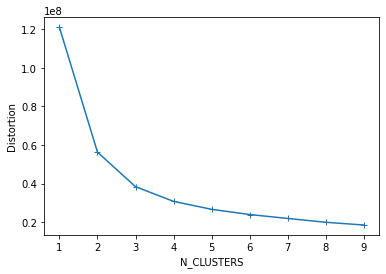

In [12]:
#on peut prendre 3 groupes mais on peut aller aussi à 4 groupes
dist_list = []
for i in range(1,10):
  clf = KMeans(n_clusters=i, max_iter=100, random_state=1234)
  clf.fit(X)
  dist_list.append(clf.inertia_)

# グラフ化
plt.plot(range(1,10), dist_list, marker='+')
plt.xlabel('N_CLUSTERS')
plt.ylabel('Distortion')

In [13]:
sclr_X = StandardScaler()
sclr_X.fit(X)
X_std = sclr_X.transform(X)

In [14]:
#based on the distortion graph , we can choose 6 group 
clf = KMeans(n_clusters=4, max_iter=100, random_state=1234)
clf.fit(X_std)

KMeans(max_iter=100, n_clusters=4, random_state=1234)

In [16]:
X["Cluster"] = clf.predict(X_std)

In [17]:
X.head()

,coupure,nb_hour_total_coupure,nb_echec,nb_hour_echec,paging_without_response_nb,nb_hour_paging_without_response,reiter_call_interval_nb,nb_hour_reiter_call,call_est_bad_setupduration_nb,nb_hour_call_est_bad_setupduration,Cluster
0,0,0,0,0,0,0,1,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,3,2,2,1,0,0,0,0,0,0,0
3,48,8,32,5,1,1,6,5,1,1,2
4,0,0,0,0,1,1,0,0,0,0,0


In [18]:
X["Cluster"].value_counts()

0    582518
1    114534
3     79296
2     23177
Name: Cluster, dtype: int64

In [19]:
test = X[X["Cluster"] == 2]
test

,coupure,nb_hour_total_coupure,nb_echec,nb_hour_echec,paging_without_response_nb,nb_hour_paging_without_response,reiter_call_interval_nb,nb_hour_reiter_call,call_est_bad_setupduration_nb,nb_hour_call_est_bad_setupduration,Cluster
3,48,8,32,5,1,1,6,5,1,1,2
24,33,6,22,4,0,0,1,1,9,6,2
73,40,6,26,4,4,4,1,1,4,3,2
105,54,7,36,5,7,3,1,1,30,2,2
107,18,6,12,4,4,3,2,2,4,4,2
...,...,...,...,...,...,...,...,...,...,...,...
798371,75,7,50,5,0,0,5,3,37,7,2
798394,49,2,32,1,13,3,1,1,29,4,2
798400,28,5,18,3,0,0,0,0,7,5,2
798517,34,6,23,4,6,4,2,2,9,2,2


<AxesSubplot:ylabel='Cluster'>

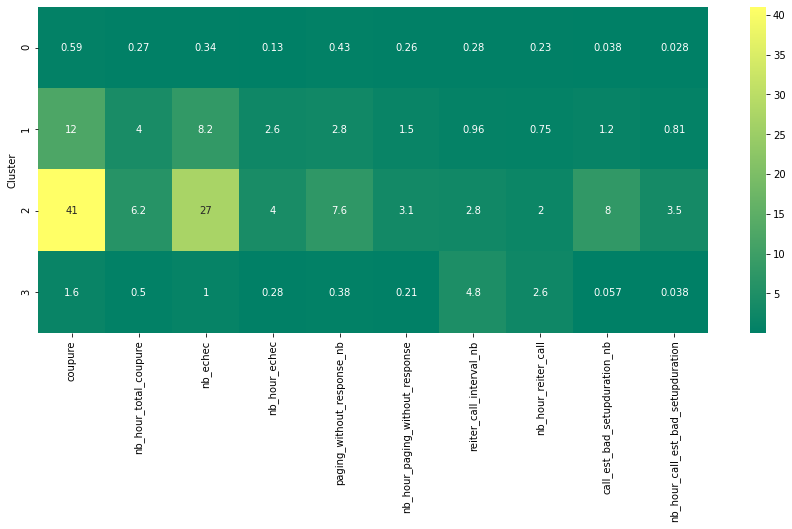

In [20]:
plt.figure(figsize=(15,6))
sns.heatmap(X.groupby("Cluster").mean(), annot=True, cmap="summer")

In [21]:
Base_kmeans["Cluster"] = clf.predict(X_std)

In [22]:
Base_kmeans

,msisdn,coupure,nb_hour_total_coupure,nb_echec,nb_hour_echec,paging_without_response_nb,nb_hour_paging_without_response,nb_call_est,reiter_call_interval_nb,nb_hour_reiter_call,call_est_bad_setupduration_nb,nb_hour_call_est_bad_setupduration,test,Cluster
0,785014784,0,0,0,0,0,0,0,1,1,0,0,4,0
1,775550564,0,0,0,0,0,0,0,0,0,0,0,4,0
2,782593354,3,2,2,1,0,0,0,0,0,0,0,4,0
3,776707624,48,8,32,5,1,1,53,6,5,1,1,4,2
4,786167884,0,0,0,0,1,1,0,0,0,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799520,778839224,0,0,0,0,0,0,1,0,0,0,0,4,0
799521,776527224,0,0,0,0,0,0,0,0,0,0,0,4,0
799522,782585254,0,0,0,0,0,0,0,0,0,0,0,4,0
799523,783676104,0,0,0,0,0,0,0,0,0,0,0,4,0


In [25]:
test = Base_kmeans[Base_kmeans["msisdn"] == 774503724]

In [26]:
test

,msisdn,coupure,nb_hour_total_coupure,nb_echec,nb_hour_echec,paging_without_response_nb,nb_hour_paging_without_response,nb_call_est,reiter_call_interval_nb,nb_hour_reiter_call,call_est_bad_setupduration_nb,nb_hour_call_est_bad_setupduration,test,Cluster
220037,774503724,0,0,0,0,0,0,0,0,0,0,0,4,0


In [27]:
Base_kmeans.to_csv('/Users/diao028606/Documents/2022/UC/Challenge QoE/Base/result_kmeans_Challenge_QoEV2.csv')